In [1]:
from numpy import save
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

def datos(file):
    data = mne.io.read_raw_edf(f'{file}.edf')
    raw_data = data.get_data()
    events, events_id = mne.events_from_annotations(data)
    tmax = 30. - 1. / data.info['sfreq']  # tmax in included

    epochs_train = mne.Epochs(raw=data, events=events,
                              event_id=events_id, tmin=0., tmax=tmax, baseline=None, event_repeated='merge')
    patatuela = epochs_train.load_data()
    id_to_class_dict = {value:key for key, value in patatuela.event_id.items()}

    objective_stages = ['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']
    epochs_to_df = [a for a in patatuela]
    epochs_to_df = []
    label_to_df = []
    for epoch, label in zip(patatuela, patatuela.events[:,-1]):
        # print(label)
        label = id_to_class_dict[label]
        if label in objective_stages:
            # print("True")
            epochs_to_df.append(epoch)
            label_to_df.append(label)
    dict_to_df = {"Epoch":epochs_to_df,"Label":label_to_df}
    df1=pd.DataFrame(dict_to_df)
    valores=df1.Epoch.values
    channels = data.ch_names
    diccionarios=[dict(zip(channels, sublist)) for sublist in valores]
    c3=[d['C3'] for d in diccionarios]
    c4=[d['C4'] for d in diccionarios]
    o1=[d['O1'] for d in diccionarios]
    o2=[d['O2'] for d in diccionarios]
    loc=[d['LOC'] for d in diccionarios]
    roc=[d['ROC'] for d in diccionarios]
    chin=[d['CHIN1'] for d in diccionarios]
    sc=StandardScaler()
    c3_sc=(c3-np.mean(c3))/np.std(c3)
    c4_sc=(c4-np.mean(c4))/np.std(c4)
    o1_sc=(o1-np.mean(o1))/np.std(o1)
    o2_sc=(o2-np.mean(o2))/np.std(o2)
    loc_sc=(loc-np.mean(loc))/np.std(loc)
    roc_sc=(roc-np.mean(roc))/np.std(roc)
    chin_sc=(chin-np.mean(chin))/np.std(chin)
    matriz=np.array([c3_sc,c4_sc,o1_sc,o2_sc,loc_sc,roc_sc,chin_sc])
    
    matriz=np.transpose(matriz,axes=(0,1,2))

    name=file
    save(f'datos_{name}.npy', matriz)
    df1.Label.to_csv(f'Etiquetas_{name}.csv',index=None)

    return matriz, df1.Label

In [2]:
from numpy import save
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filess=[f'PSG{i}' for i in range(1,15)]

In [28]:
for fil in filess:
    print(datos(fil))    #ejecutar esto para que te cree los archivos npy y csv de etiquetas pero lo dejo así para no verlo por pantalla

Extracting EDF parameters from /home/pabloro/master/PSG1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3031 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3031 events and 15360 original time points ...
1 bad epochs dropped
(array([[[-3.04381528, -3.04381528, -3.02347116, ..., -0.82856726,
         -0.88281823, -0.84213   ],
        [-0.81500452, -0.75623263, -0.7946604 

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 6 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'Central Hypopnea', 'EEG arousal', 'ENTRO A COLOCAR PULSIOXIMETRO', 'ENTRO PARA ARREGLAR CHIN', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Mixed Hypopnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oximeter Event', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage ?', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - ECG', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1287 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1287

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'Central Apnea', 'EEG arousal', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Lights On', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oximeter Event', 'Oxygen Desaturation', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Stopped Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1724 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1724 events and 15360 original time points ...
3 bad epochs dropped
(array([[[-2.63092099e+00, -2.63552550e+00, -2.647

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 39 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Headbox Disconnecting', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'NO ENTRO POR EKG', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON', 'Video System Error']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1990 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1990 events and 15360 original time points ...
1 bad epochs dropped
(array([[[-4.38911257e-01, -4.42093005e-01, -4.46335335e-01, ...,
         

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 143 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'ORINANDO', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1525 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1525 events and 15360 original time points ...
1 bad epochs dropped
(array([[[ 1.08726415,  0.53097329, 

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 234 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2767 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2767 events and 15360 original time points ...
6 bad epochs dropped
(array([[[ 2.99165156e-

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 113 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2698 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2698 events and 15360 original time points ...
7 bad epochs dropped
(array([[[ 1.24551990e-01,  1.08677665e-01,  6.61754428e-02, ...,
          1.70126662e-01,  1.47595363e-01, 

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 4 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'CAMBIO A2', 'Central Apnea', 'Central Hypopnea', 'EEG arousal', 'ENTRO A REVISAR FLOW', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Mixed Apnea', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'REVISOMA2', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'Start Recording', 'Started Analyzer - Sleep Events', 'TIENE FRIO LE PONGO UNA MANTA', 'Tachycardia']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1005 events and 15360 original time points ...
1 

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 99 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1429 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1429 events and 15360 original time points ...
1 bad epochs dropped
(array([[[-0.31882932, -0.80577164, -1.14918722, .

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 109 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage W', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1295 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1295 events and 15360 original time points ...
0 bad epochs dropped
(array([[[ 6.73496834e-01,  9.35779329e-01,  8.76335100e-01, ...,
         -8.20514433e-02, -

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 92 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['Bradycardia', 'Central Apnea', 'EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PR, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Patient Event', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
3903 matching events found
No baseline correction applied
0 projection items activated
Loading data for 3903 events and 15360 original time points ...
2 bad epochs dropped
(array([[[-1.12318829, 

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 120 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Tachycardia', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1143 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1143 events and 15360 original time points ...
1 bad epochs dropped
(array([[[ 6.47724794e-01,  1.25901628e+00,  1.49152986e+00, ...,
 

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['AHORA QUE ESTA MÃ\x81S TRANQUILO Y FINALIZANDO ', 'Bradycardia', 'CON LOS MOVIMIENTOS SE HABIA DOBLADO CANULA', 'CUANDO SE DESPIERTE REVISARE CHIN', 'CUANDO SE MUEVA REVISO BANDA ABD.', 'Central Apnea', 'EEG arousal', 'EKG CORRECTO', 'ENTRO A REVISAR FLOW', 'ESTA TODO DOBLADO A LA PART IZQ. POR ESO MALA SEÃ\x91AL EKG', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Lights On', 'Limb Movement', 'Montage:PR, Ref', 'NO VOY A ENTRAR POR ekg', 'Obstructive Apnea', 'Obstructive Hypopnea', 'Oxygen Desaturation', 'REVISO MONTAJE', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'SE MUEVE MUCHO ESTA TODO SUDADO', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events']
Not setting metadata
Multiple event values for single event ti

<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Omitted 104 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(f'{file}.edf')
<ipython-input-26-7edd626f9383>:9: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(f'{file}.edf')


Used Annotations descriptions: ['EEG arousal', 'Gain/Filter Change', 'Hypopnea', 'Impedance at 10 kOhm', 'Lights Off', 'Limb Movement', 'Montage:PSG CO2, Ref', 'Obstructive Apnea', 'Oxygen Desaturation', 'Pulse Rate Threshold Event', 'Recording Analyzer - Auto-Staging', 'Recording Analyzer - Data Trends', 'Recording Analyzer - ECG', 'Recording Analyzer - Sleep Events', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N3', 'Sleep stage R', 'Sleep stage W', 'Snoring', 'SpO2 Threshold Event', 'Start Recording', 'Started Analyzer - Sleep Events', 'Video Recording ON']
Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
2003 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2003 events and 15360 original time points ...
4 bad epochs dropped
(array([[[-7.60923121e-01, -9.39873319e-01, -9.22329181e-01, ...,
         -5.53902303e-01, -3.43372659e-0

In [69]:
datos=[f'datos_PSG{i}.npy' for i in range(1,15)]

In [70]:
matriz_tocha=[np.load(d) for d in datos]

In [76]:
for mat in matriz_tocha:
    print(np.shape(np.transpose(mat,axes=(1,2,0))))

(882, 15360, 7)
(840, 15360, 7)
(853, 15360, 7)
(762, 15360, 7)
(738, 15360, 7)
(813, 15360, 7)
(760, 15360, 7)
(853, 15360, 7)
(836, 15360, 7)
(756, 15360, 7)
(715, 15360, 7)
(764, 15360, 7)
(805, 15360, 7)
(780, 15360, 7)


In [78]:
matriz_tocha=[np.transpose(mat,axes=(1,2,0)) for mat in matriz_tocha]

In [5]:
etiquetas=[f'Etiquetas_PSG{i}.csv' for i in range(1,15)]

In [6]:
et_todas=[pd.read_csv(d).iloc[:,0] for d in etiquetas]

In [7]:
from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()

transformadas=[le.fit_transform(et) for et in et_todas]

In [8]:
X_train1=np.load('datos_PSG1.npy')
X_tr1=np.transpose(X_train1,axes=(1,2,0))
X_train2=np.load('datos_PSG2.npy')
X_tr2=np.transpose(X_train2,axes=(1,2,0))
X_train3=np.load('datos_PSG3.npy')
X_tr3=np.transpose(X_train3,axes=(1,2,0))
X_train4=np.load('datos_PSG4.npy')
X_tr4=np.transpose(X_train4,axes=(1,2,0))
X_train5=np.load('datos_PSG5.npy')
X_tr5=np.transpose(X_train5,axes=(1,2,0))
X_train6=np.load('datos_PSG6.npy')
X_tr6=np.transpose(X_train6,axes=(1,2,0))
X_train7=np.load('datos_PSG7.npy')
X_tr7=np.transpose(X_train7,axes=(1,2,0))
X_train8=np.load('datos_PSG8.npy')
X_tr8=np.transpose(X_train8,axes=(1,2,0))
X_train9=np.load('datos_PSG9.npy')
X_tr9=np.transpose(X_train9,axes=(1,2,0))
# X_train10=np.load('datos_PSG10.npy')
# X_tr10=np.transpose(X_train10,axes=(1,2,0))
X_train11=np.load('datos_PSG11.npy')
X_tr11=np.transpose(X_train11,axes=(1,2,0))
X_train12=np.load('datos_PSG12.npy')
X_tr12=np.transpose(X_train12,axes=(1,2,0))
X_train13=np.load('datos_PSG13.npy')
X_tr13=np.transpose(X_train13,axes=(1,2,0))
X_train14=np.load('datos_PSG14.npy')
X_tr14=np.transpose(X_train14,axes=(1,2,0))

In [61]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

y_train1=pd.read_csv('Etiquetas_PSG1.csv')
y_train2=pd.read_csv('Etiquetas_PSG2.csv')
y_train3=pd.read_csv('Etiquetas_PSG3.csv')
y_train4=pd.read_csv('Etiquetas_PSG4.csv')
y_train5=pd.read_csv('Etiquetas_PSG5.csv')
y_train6=pd.read_csv('Etiquetas_PSG6.csv')
y_train7=pd.read_csv('Etiquetas_PSG7.csv')
y_train8=pd.read_csv('Etiquetas_PSG8.csv')
y_train9=pd.read_csv('Etiquetas_PSG9.csv')
y_train10=pd.read_csv('Etiquetas_PSG10.csv')
y_train11=pd.read_csv('Etiquetas_PSG11.csv')
y_train12=pd.read_csv('Etiquetas_PSG12.csv')
y_train13=pd.read_csv('Etiquetas_PSG13.csv')
y_train14=pd.read_csv('Etiquetas_PSG14.csv')



le=LabelEncoder()
y_tr1 = le.fit_transform(y_train1)
y_tr2 = le.fit_transform(y_train2)
y_tr3 = le.fit_transform(y_train3)
y_tr4 = le.fit_transform(y_train4)
y_tr5 = le.fit_transform(y_train5)
y_tr6 = le.fit_transform(y_train6)
y_tr7 = le.fit_transform(y_train7)
y_tr8 = le.fit_transform(y_train8)
y_tr9 = le.fit_transform(y_train9)
y_tr10 = le.fit_transform(y_train10)
y_tr11 = le.fit_transform(y_train11)
y_tr12 = le.fit_transform(y_train12)
y_tr13 = le.fit_transform(y_train13)
y_tr14 = le.fit_transform(y_train14)

/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [59]:
b=[f'Paciente_{i}' for i in range(1,15)]

In [65]:
from collections import Counter

y_todos=[y_tr1,y_tr2,y_tr3,y_tr4,y_tr5,y_tr6,y_tr7,y_tr8,y_tr9,y_tr10,y_tr11,y_tr12,y_tr13,y_tr14]

for y,z in zip(y_todos,b):
    print(z,'\n')
    print(Counter(y))

Paciente_1 

Counter({1: 317, 4: 246, 2: 193, 3: 101, 0: 25})
Paciente_2 

Counter({1: 388, 2: 235, 3: 136, 0: 63, 4: 18})
Paciente_3 

Counter({1: 365, 2: 219, 0: 145, 3: 86, 4: 38})
Paciente_4 

Counter({1: 334, 2: 209, 4: 115, 3: 69, 0: 35})
Paciente_5 

Counter({1: 370, 2: 146, 4: 103, 0: 85, 3: 34})
Paciente_6 

Counter({1: 392, 4: 177, 0: 143, 2: 76, 3: 25})
Paciente_7 

Counter({1: 405, 4: 191, 2: 94, 3: 57, 0: 13})
Paciente_8 

Counter({2: 419, 1: 308, 3: 74, 4: 37, 0: 15})
Paciente_9 

Counter({2: 286, 4: 242, 1: 208, 3: 64, 0: 36})
Paciente_10 

Counter({1: 455, 3: 173, 2: 114, 0: 14})
Paciente_11 

Counter({1: 248, 4: 185, 2: 185, 3: 93, 0: 4})
Paciente_12 

Counter({1: 403, 2: 218, 3: 94, 4: 35, 0: 14})
Paciente_13 

Counter({1: 293, 2: 169, 4: 130, 0: 127, 3: 86})
Paciente_14 

Counter({1: 448, 4: 216, 0: 67, 2: 37, 3: 12})


In [ ]:
from sklearn.model_selection import train_test_split

# X_tra1,X_te1,y_tra1,y_te1=train_test_split(X_tr1,y_tr1,train_size=0.7,shuffle=True)
# X_tra2,X_te2,y_tra2,y_te2=train_test_split(X_tr2,y_tr2,train_size=0.7,shuffle=True)
# X_tra3,X_te3,y_tra3,y_te3=train_test_split(X_tr3,y_tr3,train_size=0.7,shuffle=True)
# X_tra4,X_te4,y_tra4,y_te4=train_test_split(X_tr4,y_tr4,train_size=0.7,shuffle=True)
# X_tra5,X_te5,y_tra5,y_te5=train_test_split(X_tr5,y_tr5,train_size=0.7,shuffle=True)
# X_tra6,X_te6,y_tra6,y_te6=train_test_split(X_tr6,y_tr6,train_size=0.7,shuffle=True)
# X_tra7,X_te7,y_tra7,y_te7=train_test_split(X_tr7,y_tr7,train_size=0.7,shuffle=True)
# X_tra8,X_te8,y_tra8,y_te8=train_test_split(X_tr8,y_tr8,train_size=0.7,shuffle=True)
# X_tra9,X_te9,y_tra9,y_te9=train_test_split(X_tr9,y_tr9,train_size=0.7,shuffle=True)
# X_tra10,X_te10,y_tra10,y_te10=train_test_split(X_tr10,y_tr10,train_size=0.7,shuffle=True)
# X_tra11,X_te11,y_tra11,y_te11=train_test_split(X_tr11,y_tr11,train_size=0.7,shuffle=True)
# X_tra12,X_te12,y_tra12,y_te12=train_test_split(X_tr12,y_tr12,train_size=0.7,shuffle=True)
# X_tra13,X_te13,y_tra13,y_te13=train_test_split(X_tr13,y_tr13,train_size=0.7,shuffle=True)
# X_tra14,X_te14,y_tra14,y_te14=train_test_split(X_tr14,y_tr14,train_size=0.7,shuffle=True)

In [ ]:
# from sklearn.preprocessing import StandardScaler,LabelEncoder

# le=LabelEncoder()
# y_tr1 = le.fit_transform(y_tra1)
# y_test1 = le.transform(y_te1)
# y_tr2 = le.fit_transform(y_tra2)
# y_test2 = le.transform(y_te2)
# y_tr3 = le.fit_transform(y_tra3)
# y_test3 = le.transform(y_te3)
# y_tr4 = le.fit_transform(y_tra4)
# y_test4 = le.transform(y_te4)
# y_tr5 = le.fit_transform(y_tra5)
# y_test5 = le.transform(y_te5)
# y_tr6 = le.fit_transform(y_tra6)
# y_test6 = le.transform(y_te6)
# y_tr7 = le.fit_transform(y_tra7)
# y_test7 = le.transform(y_te7)
# y_tr8 = le.fit_transform(y_tra8)
# y_test8 = le.transform(y_te8)
# y_tr9 = le.fit_transform(y_tra9)
# y_test9 = le.transform(y_te9)
# y_tr10 = le.fit_transform(y_tra10)
# y_test10 = le.transform(y_te10)
# y_tr11 = le.fit_transform(y_tra11)
# y_test11 = le.transform(y_te11)
# y_tr12 = le.fit_transform(y_tra12)
# y_test12 = le.transform(y_te12)
# y_tr13 = le.fit_transform(y_tra13)
# y_test13 = le.transform(y_te13)
# y_tr14 = le.fit_transform(y_tra14)
# y_test14 = le.transform(y_te14)

In [86]:
from collections import Counter

# Counter(y_te1.iloc[:,-1]),Counter(y_test1)

In [10]:
from matplotlib.ticker import MaxNLocator
from IPython.display import SVG, display, clear_output
import matplotlib.pyplot as plt

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [12]:
import tensorflow

X_train_definitivo=tensorflow.concat([X_tr1,X_tr2,X_tr3,X_tr4,X_tr5,X_tr6,X_tr7,X_tr8,X_tr9,X_tr11],axis=0)
y_train_definitivo=tensorflow.concat([y_tr1,y_tr2,y_tr3,y_tr4,y_tr5,y_tr6,y_tr7,y_tr8,y_tr9,y_tr11],axis=0)
X_test_definitivo=tensorflow.concat([X_tr12,X_tr13,X_tr14],axis=0)
y_test_definitivo=tensorflow.concat([y_tr12,y_tr13,y_tr14],axis=0)

In [13]:
X_todos=tensorflow.concat([X_tr1,X_tr2,X_tr3,X_tr4,X_tr5,X_tr6,X_tr7,X_tr8,X_tr9,X_tr11,X_tr12,X_tr13,X_tr14],axis=0)

In [14]:
y_todos=tensorflow.concat([y_tr1,y_tr2,y_tr3,y_tr4,y_tr5,y_tr6,y_tr7,y_tr8,y_tr9,y_tr11,y_tr12,y_tr13,y_tr14],axis=0)

In [15]:
X_todos=X_todos.numpy()
y_todos=y_todos.numpy()

In [17]:
from sklearn.model_selection import train_test_split

X_train_todos,X_test_todos,y_train_todos,y_test_todos=train_test_split(X_todos,y_todos,train_size=0.75,shuffle=True)

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling1D,BatchNormalization, UpSampling1D,Input,Dense,LSTM,MaxPooling1D, Dropout,Conv1D, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

input1=Input(shape=(15360,7))
conv1=Conv1D(128, kernel_size=256, padding='same', strides=128, activation="relu")(input1)
max1=MaxPooling1D(8)(conv1)
drop1=Dropout(0.5)(max1)
conv2=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop1)
conv3=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv2)
conv4=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv3)
max2=MaxPooling1D(4)(conv4)
drop2=Dropout(0.5)(max2)
lstm1=LSTM(128)(drop2)
dense1=Dense(5,'softmax')(lstm1)
model=Model(input1,dense1)
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.summary()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10135068081241904081
]
Num GPUs Available:  0
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 15360, 7)]        0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 120, 128)          229504    
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 15, 128)           0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 128)           0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 15, 128)           131200    
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 15, 128)        

#### Modelo con un paciente

In [19]:
X_tr,X_te,y_tr,y_te=train_test_split(X_tr1,y_tr1,shuffle=True,train_size=0.7)

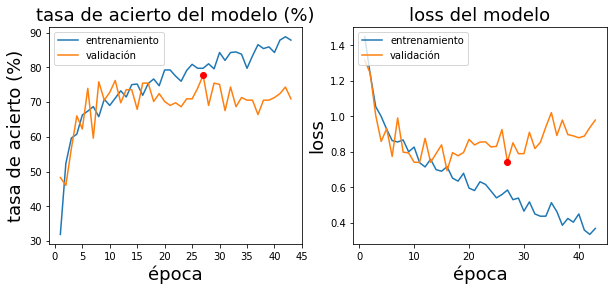

32/52 [=================>............] - ETA: 0s - loss: 0.4129 - accuracy: 0.8490

KeyboardInterrupt: 

In [42]:
filepath='7canales_1paciente.h5'
checkpoint   = [EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
                ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')]

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs=50
batch_size=12


for e in range(epochs):
    history = model.fit(X_tr, y_tr,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=checkpoint,
                        verbose=1,
                        validation_data=(X_te, y_te))

    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
              best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]

    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])

    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

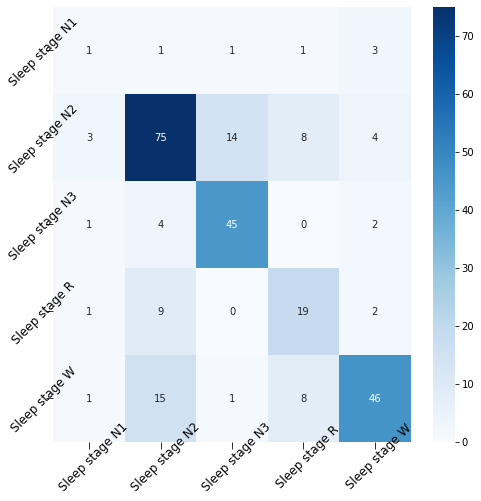

In [43]:
y_pred=np.argmax(model.predict(X_te),axis=1)

fig, ax = plt.subplots(figsize=(8,8))

cm=confusion_matrix(y_te,y_pred)
lista2=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']
sns.heatmap(pd.DataFrame(cm,index=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W'],columns=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']),annot=True,fmt='d',cmap='Blues', ax=ax)

params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
ax.tick_params(size=7)
ax.set_xticklabels(lista2,fontsize=12)
ax.set_yticklabels(lista2,fontsize=12);

#### Si utilizamos el modelo para predecir el resto de pacientes

In [45]:
from sklearn.metrics import classification_report
X1=[X_tr2,X_tr3,X_tr4,X_tr5,X_tr6,X_tr7,X_tr8,X_tr9,X_tr11,X_tr12,X_tr13,X_tr14]
y1=[y_tr2,y_tr3,y_tr4,y_tr5,y_tr6,y_tr7,y_tr8,y_tr9,y_tr11,y_tr12,y_tr13,y_tr14]

numero=[f'paciente número {i}' for i in range(2,13)]
for a,b,num in zip(X1,y1,numero):
    print(num,'\n')
    print('\n',classification_report(b,np.argmax(model.predict(a),axis=1),target_names=lista2))

paciente número 2 


                 precision    recall  f1-score   support

Sleep stage N1       0.08      0.03      0.05        63
Sleep stage N2       0.60      0.35      0.44       388
Sleep stage N3       0.64      0.40      0.49       235
 Sleep stage R       0.41      0.50      0.45       136
 Sleep stage W       0.05      0.72      0.09        18

      accuracy                           0.37       840
     macro avg       0.36      0.40      0.30       840
  weighted avg       0.53      0.37      0.42       840

paciente número 3 


                 precision    recall  f1-score   support

Sleep stage N1       0.08      0.01      0.01       145
Sleep stage N2       0.61      0.60      0.61       365
Sleep stage N3       0.72      0.67      0.69       219
 Sleep stage R       0.29      0.49      0.37        86
 Sleep stage W       0.12      0.42      0.19        38

      accuracy                           0.50       853
     macro avg       0.36      0.44      0.37       853

#### Un paciente pero cambiado el train y test

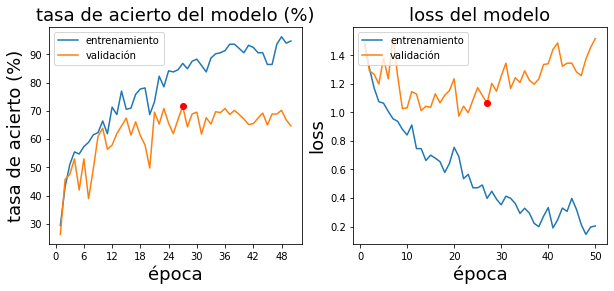

In [72]:
filepath='model_current_best_juntos.h5'
checkpoint   = [EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
                ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')]

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs=50
batch_size=16


for e in range(epochs):
    history = model.fit(X_te, y_te,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=checkpoint,
                        verbose=1,
                        validation_data=(X_tr, y_tr))

    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
              best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]

    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])

    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

#### Todos juntos se parados por pacientes

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling1D,BatchNormalization, UpSampling1D,Input,Dense,LSTM,MaxPooling1D, Dropout,Conv1D, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

input1=Input(shape=(15360,7))
conv1=Conv1D(256, kernel_size=256, padding='same', strides=128, activation="relu")(input1)
max1=MaxPooling1D(12)(conv1)
drop1=Dropout(0.5)(max1)
conv2=Conv1D(256, kernel_size=8, padding='same', strides=1, activation="relu")(drop1)
conv3=Conv1D(256, kernel_size=8, padding='same', strides=1, activation="relu")(conv2)
conv4=Conv1D(256, kernel_size=8, padding='same', strides=1, activation="relu")(conv3)
max2=MaxPooling1D(8)(conv4)
drop2=Dropout(0.5)(max2)
lstm1=LSTM(256)(drop2)
dense1=Dense(5,'softmax')(lstm1)
model=Model(input1,dense1)
model.compile(optimizer=Adam(0.01),metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.summary()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1480731980114656724
]
Num GPUs Available:  0
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 15360, 7)]        0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 120, 256)          459008    
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 10, 256)           0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 10, 256)           0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 10, 256)           524544    
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 10, 256)         

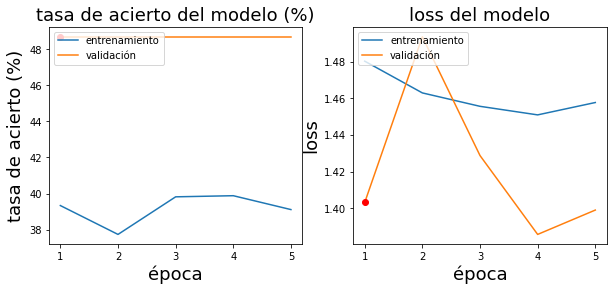

118/126 [===========================>..] - ETA: 0s - loss: 1.4563 - accuracy: 0.3807

KeyboardInterrupt: 

In [55]:
filepath='model7canales_todos_juntos.h5'
checkpoint   = [EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
                ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')]

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs=50
batch_size=64


for e in range(epochs):
    history = model.fit(X_train_definitivo, y=y_train_definitivo,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=checkpoint,
                        verbose=1,
                        validation_data=(X_test_definitivo, y_test_definitivo))

    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
              best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]

    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])

    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

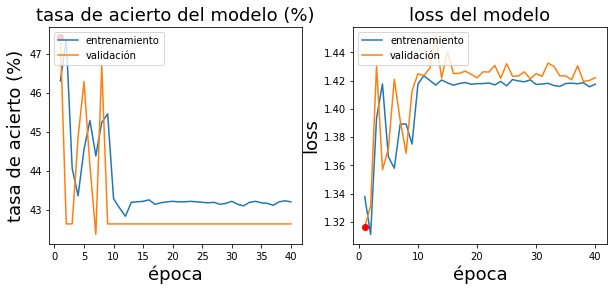

191/488 [==========>...................] - ETA: 4s - loss: 1.4144 - accuracy: 0.4277

KeyboardInterrupt: 

In [83]:
filepath='model_current_best_juntos.h5'
checkpoint   = [EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
                ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')]

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs=50
batch_size=16


for e in range(epochs):
    history = model.fit(X_train_todos, y=y_train_todos,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=checkpoint,
                        verbose=1,
                        validation_data=(X_test_todos, y_test_todos))

    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
              best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]

    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])

    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [22]:
predictions=np.argmax(model.predict(X_test_definitivo,steps=10),axis=1)

In [41]:
# X_test_definitivo.eval(session=tensorflow.compat.v1.Session())

In [40]:
preds=np.argmax(model.predict(X_test_definitivo.eval(session=tensorflow.compat.v1.Session())),axis=1)

In [44]:
np.unique(preds)

array([1, 4])

In [36]:
y_test_definitivo.eval(session=tensorflow.compat.v1.Session())

array([4, 4, 4, ..., 1, 1, 1])

In [52]:
Counter(preds)

Counter({1: 2348, 4: 1})

In [50]:
from sklearn.metrics import recall_score,classification_report

print(classification_report(y_test_definitivo.eval(session=tensorflow.compat.v1.Session()),preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.49      1.00      0.66      1144
           2       0.00      0.00      0.00       424
           3       0.00      0.00      0.00       192
           4       0.00      0.00      0.00       381

    accuracy                           0.49      2349
   macro avg       0.10      0.20      0.13      2349
weighted avg       0.24      0.49      0.32      2349



/home/pabloro/anaconda3/envs/master/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/master/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/master/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [34]:
Counter(y_test_definitivo.eval(session=tensorflow.compat.v1.Session()))

Counter({4: 381, 0: 208, 1: 1144, 2: 424, 3: 192})

In [ ]:
filepath='model_current_best_juntos.h5'
checkpoint = ModelCheckpoint(filepath,monitor='val_loss', verbose=1,
                             save_best_only=True,
                             mode='min') # graba sólo los que mejoran en validación

acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs=50
batch_size=16


for e in range(epochs):
    history = model.fit(X_train_definitivo, y=y_train_definitivo,
                        batch_size=batch_size,
                        epochs=1,
                        callbacks=[checkpoint],steps_per_epoch=2,
                        verbose=1,
                        validation_data=(X_test_definitivo, y_test_definitivo))

    if history.history['val_acc'][-1] > best_val_acc:
        print("Validation accuracy improved from",
              best_val_acc, 'to', history.history['val_acc'])
        print("saving weights")
        best_val_acc = history.history['val_acc'][-1]

    acum_tr_acc.append(history.history['acc'][0])
    acum_val_acc.append(history.history['val_acc'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])

    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [58]:
a=[f'Paciente_{i}' for i in range(1,15)]

In [ ]:
# for X,y,z in zip(matriz_tocha,transformadas,a):
#     print(f'\n{z}\n')
#     X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=True)
#     print(y_train.shape,y_test.shape)
    

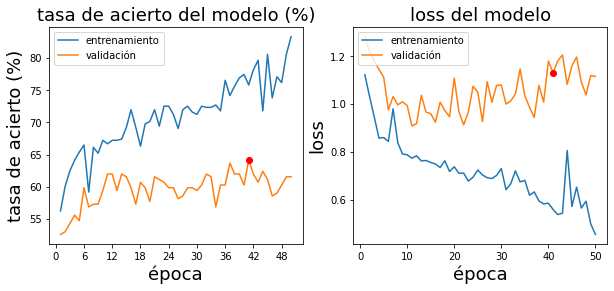

18/18 [==============================] - 0s 10ms/step - loss: 0.3731 - accuracy: 0.8516
Train loss    : 0.37312811613082886
Train accuracy: 0.8516483306884766

8/8 [==============================] - 0s 11ms/step - loss: 1.1155 - accuracy: 0.6154
Val loss    : 1.1155060529708862
Val accuracy: 0.6153846383094788



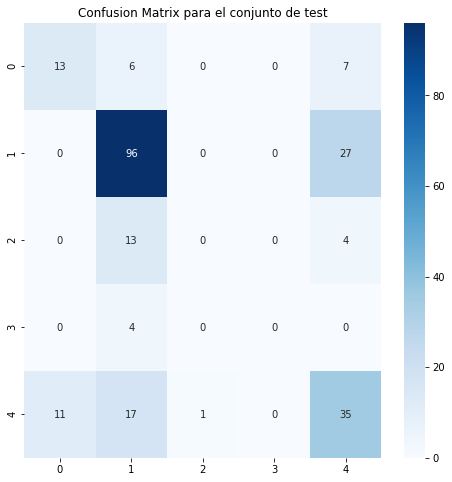

In [83]:
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling1D,BatchNormalization, UpSampling1D,Input,Dense,LSTM,MaxPooling1D, Dropout,Conv1D, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
# config = tensorflow.ConfigProto(
#         device_count = {'GPU': 0}
#     )
# sess = tf.Session(config=config)
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

for X,y,z in zip(matriz_tocha,transformadas,a):
    print(f'\nmodelo para {z}\n')
        
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=True)
    
    opciones = {f"inputs_train_{z}": X_train,f"inputs_test_{z}": X_test,f'output_train_{z}':y_train,f'output_test_{z}':y_test}
    with open(f"inputs_{z}.pkl", "wb") as f:
        pickle.dump(opciones, f)
    
    input1=Input(shape=(15360,7))
    conv1=Conv1D(128, kernel_size=256, padding='same', strides=128, activation="relu")(input1)
    batch1=BatchNormalization()(conv1)
    max1=MaxPooling1D(6,6)(batch1)
    drop1=Dropout(0.5)(max1)
    conv2=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop1)
    conv3=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv2)
    conv4=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv3)
    max2=MaxPooling1D(4)(conv4)
    drop2=Dropout(0.5)(max2)
    lstm1=LSTM(128)(drop2)
    dense1=Dense(5,'softmax')(lstm1)
    model=Model(input1,dense1)
    model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
    
    filepath=f'model_current_best_{z}.h5'
    checkpoint = ModelCheckpoint(filepath,monitor='val_loss', verbose=1,
                                 save_best_only=True,
                                 mode='min') # graba sólo los que mejoran en validación

    acum_tr_acc = []
    acum_val_acc = []
    best_val_acc = -1000
    acum_tr_loss  = []
    acum_val_loss = []
    
    epochs=50
    batch_size=16
    

    for e in range(epochs):
        history = model.fit(X_train, y=y_train,
                            batch_size=batch_size,
                            epochs=1,
                            callbacks=[checkpoint],
                            verbose=1,
                            validation_data=(X_test, y_test))

        if history.history['val_accuracy'][-1] > best_val_acc:
            print("Validation accuracy improved from",
                  best_val_acc, 'to', history.history['val_accuracy'])
            print("saving weights")
            best_val_acc = history.history['val_accuracy'][-1]

        acum_tr_acc.append(history.history['accuracy'][0])
        acum_val_acc.append(history.history['val_accuracy'][0])
        acum_tr_loss.append(history.history['loss'][0])
        acum_val_loss.append(history.history['val_loss'][0])

        if len(acum_tr_acc) > 1:
            clear_output()
            best_i = np.argmax(acum_val_acc)
            grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)


#         plt.xlabel('Épocas')
#         plt.ylabel('Error')
#         plt.plot(hist.history['loss'])
#         plt.plot(hist.history['val_loss'])
#         plt.legend(['Entrenamiento', 'Validación'])
#         plt.show()

#         plt.xlabel('Épocas')
#         plt.ylabel('Acierto')
#         plt.plot(hist.history['accuracy'])
#         plt.plot(hist.history['val_accuracy'])
#         plt.legend(['Entrenamiento', 'Validación'])
#         plt.show()

    scores_tr = model.evaluate(X_train,y_train)
    print('Train loss    :', scores_tr[0])
    print('Train accuracy:', scores_tr[1])
    print()

    scores_val = model.evaluate(X_test,y_test)
    print('Val loss    :', scores_val[0])
    print('Val accuracy:', scores_val[1])
    print()

#     lista2=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']
#     clases={v:k for v,k in enumerate(lista2)}

    y_pred_proba=model.predict(X_test)

    cm = confusion_matrix(y_test, np.argmax(model.predict(X_test),axis=1))

    fig, ax = plt.subplots(figsize=(8,8))

#     sns.heatmap(pd.DataFrame(cm,index=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W'],columns=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']),annot=True,fmt='d',cmap='Blues', ax=ax)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues', ax=ax)
#     ax.tick_params(size=7)
#     ax.set_xticklabels(lista2,fontsize=12)
#     ax.set_yticklabels(lista2,fontsize=12)

    # ax.set(
    #     xticklabels=list(label_to_class.keys()),
    #     yticklabels=list(label_to_class.keys()),
    #     title='confusion matrix',
    #     ylabel='True label',
    #     xlabel='Predicted label'
    # )

    plt.title('Confusion Matrix para el conjunto de test')
    plt.show()

In [88]:
for i in range(1,15):
    print(f'Classification report para el paciente número={i}\n')
    with open(f"inputs_Paciente_{i}.pkl", "rb") as f:
        opciones = pickle.load(f)
    X_train= opciones[f"inputs_train_Paciente_{i}"]
    y_train= opciones[f"output_train_Paciente_{i}"]
    X_test= opciones[f"inputs_test_Paciente_{i}"]
    y_test= opciones[f"output_test_Paciente_{i}"]
    modelpath=f"model_current_best_Paciente_{i}.h5"
    model=load_model(modelpath)
    y_pred=np.argmax(model.predict(X_test),axis=1)
    print(classification_report(y_test,y_pred))

Classification report para el paciente número=1



/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.64      0.73      0.69        98
           2       0.77      0.79      0.78        61
           3       0.73      0.32      0.44        25
           4       0.70      0.76      0.73        74

    accuracy                           0.69       265
   macro avg       0.57      0.52      0.53       265
weighted avg       0.68      0.69      0.68       265

Classification report para el paciente número=2



/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.63      0.73      0.68       120
           2       0.62      0.44      0.52        70
           3       0.52      0.78      0.63        41
           4       0.00      0.00      0.00         4

    accuracy                           0.60       252
   macro avg       0.35      0.39      0.36       252
weighted avg       0.56      0.60      0.57       252

Classification report para el paciente número=3

              precision    recall  f1-score   support

           0       0.64      0.68      0.66        44
           1       0.76      0.70      0.73       107
           2       0.75      0.85      0.80        67
           3       0.82      0.96      0.89        28
           4       0.00      0.00      0.00        10

    accuracy                           0.74       256
   macro avg       0.59      0.64      0.61       256
weighted avg       0.71     

/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.63      0.58      0.60        97
           2       0.63      0.77      0.69        60
           3       0.12      0.12      0.12        17
           4       0.67      0.83      0.74        41

    accuracy                           0.60       229
   macro avg       0.41      0.46      0.43       229
weighted avg       0.56      0.60      0.58       229

Classification report para el paciente número=5



/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.22      0.09      0.13        22
           1       0.63      0.81      0.71       107
           2       0.48      0.28      0.36        46
           3       0.00      0.00      0.00        16
           4       0.53      0.81      0.64        31

    accuracy                           0.57       222
   macro avg       0.37      0.40      0.37       222
weighted avg       0.50      0.57      0.52       222

Classification report para el paciente número=6



/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.54      0.98      0.70       104
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         6
           4       0.55      0.44      0.49        70

    accuracy                           0.55       244
   macro avg       0.22      0.28      0.24       244
weighted avg       0.39      0.55      0.44       244

Classification report para el paciente número=7



/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.71      0.76      0.73       115
           2       0.59      0.90      0.71        30
           3       0.62      0.33      0.43        15
           4       0.63      0.52      0.57        64

    accuracy                           0.67       228
   macro avg       0.51      0.50      0.49       228
weighted avg       0.66      0.67      0.65       228

Classification report para el paciente número=8



/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.69      0.73      0.71       103
           2       0.81      0.82      0.81       119
           3       0.55      0.52      0.53        23
           4       0.80      0.40      0.53        10

    accuracy                           0.73       256
   macro avg       0.57      0.49      0.52       256
weighted avg       0.73      0.73      0.73       256

Classification report para el paciente número=9



/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.45      0.40      0.42        63
           2       0.55      0.74      0.63        87
           3       0.78      0.33      0.47        21
           4       0.77      0.81      0.79        67

    accuracy                           0.60       251
   macro avg       0.51      0.45      0.46       251
weighted avg       0.57      0.60      0.57       251

Classification report para el paciente número=10



/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.78      0.77      0.77       136
           2       0.40      0.65      0.49        31
           3       0.86      0.63      0.73        57

    accuracy                           0.71       227
   macro avg       0.51      0.51      0.50       227
weighted avg       0.74      0.71      0.71       227

Classification report para el paciente número=11

              precision    recall  f1-score   support

           1       0.75      0.55      0.63        80
           2       0.57      0.64      0.61        56
           3       0.66      1.00      0.79        29
           4       0.88      0.86      0.87        50

    accuracy                           0.71       215
   macro avg       0.71      0.76      0.73       215
weighted avg       0.72      0.71      0.70       215

Classification report para el paciente número=12



/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.71      0.73      0.72       112
           2       0.56      0.68      0.62        65
           3       0.65      0.67      0.66        33
           4       0.67      0.12      0.21        16

    accuracy                           0.65       230
   macro avg       0.52      0.44      0.44       230
weighted avg       0.65      0.65      0.63       230

Classification report para el paciente número=13

              precision    recall  f1-score   support

           0       0.43      0.29      0.34        35
           1       0.81      0.82      0.82        89
           2       0.82      0.91      0.86        54
           3       0.62      0.69      0.65        26
           4       0.68      0.71      0.69        38

    accuracy                           0.73       242
   macro avg       0.67      0.68      0.67       242
weighted avg       0.72    

/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pabloro/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [ ]:
import pickle

with open("inputs_Paciente_13.pkl", "rb") as f:
    opciones = pickle.load(f)

In [ ]:
X_train= opciones["inputs_train_Paciente_13"]
y_train= opciones["output_train_Paciente_13"]
X_test= opciones["inputs_test_Paciente_13"]
y_test= opciones["output_test_Paciente_13"]

In [ ]:
modelpath="model_current_best_Paciente_13.h5"
model=load_model(modelpath)

In [ ]:
scores_tr = model.evaluate(X_train,y_train)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(X_test,y_test)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

In [ ]:
from collections import Counter

Counter(y_test),Counter(y_train)

In [ ]:
y_pred=np.argmax(model.predict(X_test),axis=1)

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(pd.DataFrame(cm,index=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W'],columns=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']),annot=True,fmt='d',cmap='Blues', ax=ax)

params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
ax.tick_params(size=7)
ax.set_xticklabels(lista2,fontsize=12)
ax.set_yticklabels(lista2,fontsize=12);

In [ ]:
from sklearn.metrics import classification_report

target_names=['Sleep stage N1','Sleep stage N2','Sleep stage N3','Sleep stage R','Sleep stage W']

print(classification_report(y_test,y_pred,target_names=target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def conf_matrix(X,y,conjunto):
    y_preds = model.predict(X)
    y_preds = np.argmax(y_preds, axis=1)
    cm = confusion_matrix(y, y_preds)

    fig, ax = plt.subplots(figsize=(7, 6))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

    
    params = dict(rotation=45, ha='center', rotation_mode='anchor')
    plt.setp(ax.get_yticklabels(), **params)
    plt.setp(ax.get_xticklabels(), **params)
    plt.title('Resultados predicción conjunto de %s'%(conjunto))
    plt.show()

In [ ]:
conf_matrix(X_te1,y_test1,conjunto='Test')

In [84]:
# from tensorflow.keras.layers import AveragePooling1D,BatchNormalization, UpSampling1D,Input,Dense,LSTM,MaxPooling1D, Dropout,Conv1D, concatenate
# from tensorflow.keras.models import Model


# input1=Input(shape=(X_tra1.shape[1],7))
# conv1=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input1)
# batch1=BatchNormalization()(conv1)
# max1=MaxPooling1D(8,8)(batch1)
# drop1=Dropout(0.5)(max1)
# conv2=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop1)
# conv3=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv2)
# conv4=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv3)
# max2=MaxPooling1D(4)(conv4)
# drop2=Dropout(0.5)(max2)
# lstm1=LSTM(128)(drop2)

# input12=Input(shape=(X_tra2.shape[1],7))
# conv12=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input12)
# batch2=BatchNormalization()(conv12)
# max12=MaxPooling1D(8)(batch2)
# drop12=Dropout(0.5)(max12)
# conv22=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop12)
# conv32=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv22)
# conv42=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv32)
# max22=MaxPooling1D(4)(conv42)
# drop22=Dropout(0.5)(max22)
# lstm12=LSTM(128)(drop22)

# input13=Input(shape=(X_tra3.shape[1],7))
# conv13=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input13)
# batch3=BatchNormalization()(conv13)
# max13=MaxPooling1D(8)(batch3)
# drop13=Dropout(0.5)(max13)
# conv23=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop13)
# conv33=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv23)
# conv43=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv33)
# max23=MaxPooling1D(4)(conv43)
# drop23=Dropout(0.5)(max23)
# lstm13=LSTM(128)(drop23)

# input14=Input(shape=(X_tra4.shape[1],7))
# conv14=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input14)
# batch4=BatchNormalization()(conv14)
# max14=MaxPooling1D(8)(batch4)
# drop14=Dropout(0.5)(max14)
# conv24=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop14)
# conv34=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv24)
# conv44=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv34)
# max24=MaxPooling1D(4)(conv44)
# drop24=Dropout(0.5)(max24)
# lstm14=LSTM(128)(drop24)

# input15=Input(shape=(X_tra5.shape[1],7))
# conv15=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input15)
# batch5=BatchNormalization()(conv15)
# max15=MaxPooling1D(8)(batch5)
# drop15=Dropout(0.5)(max15)
# conv25=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop15)
# conv35=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv25)
# conv45=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv35)
# max25=MaxPooling1D(4)(conv45)
# drop25=Dropout(0.5)(max25)
# lstm15=LSTM(128)(drop25)

# input16=Input(shape=(X_tra6.shape[1],7))
# conv16=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input16)
# batch6=BatchNormalization()(conv16)
# max16=MaxPooling1D(8)(batch6)
# drop16=Dropout(0.5)(max16)
# conv26=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop16)
# conv36=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv26)
# conv46=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv36)
# max26=MaxPooling1D(4)(conv46)
# drop26=Dropout(0.5)(max26)
# lstm16=LSTM(128)(drop26)

# input17=Input(shape=(X_tra7.shape[1],7))
# conv17=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input17)
# batch7=BatchNormalization()(conv17)
# max17=MaxPooling1D(8)(batch7)
# drop17=Dropout(0.5)(max17)
# conv27=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop17)
# conv37=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv27)
# conv47=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv37)
# max27=MaxPooling1D(4)(conv47)
# drop27=Dropout(0.5)(max27)
# lstm17=LSTM(128)(drop27)

# input18=Input(shape=(X_tra8.shape[1],7))
# conv18=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input18)
# batch8=BatchNormalization()(conv18)
# max18=MaxPooling1D(8)(batch8)
# drop18=Dropout(0.5)(max12)
# conv28=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop18)
# conv38=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv28)
# conv48=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv38)
# max28=MaxPooling1D(4)(conv48)
# drop28=Dropout(0.5)(max28)
# lstm18=LSTM(128)(drop28)

# input19=Input(shape=(X_tra9.shape[1],7))
# conv19=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input19)
# batch9=BatchNormalization()(conv19)
# max19=MaxPooling1D(8)(batch9)
# drop19=Dropout(0.5)(max19)
# conv29=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop19)
# conv39=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv29)
# conv49=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv39)
# max29=MaxPooling1D(4)(conv49)
# drop29=Dropout(0.5)(max29)
# lstm19=LSTM(128)(drop29)

# input110=Input(shape=(X_tra10.shape[1],7))
# conv110=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input110)
# batch10=BatchNormalization()(conv110)
# max110=MaxPooling1D(8)(batch10)
# drop110=Dropout(0.5)(max110)
# conv210=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop110)
# conv310=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv210)
# conv410=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv310)
# max210=MaxPooling1D(4)(conv410)
# drop210=Dropout(0.5)(max210)
# lstm110=LSTM(128)(drop210)

# input111=Input(shape=(X_tra11.shape[1],7))
# conv111=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input111)
# batch11=BatchNormalization()(conv111)
# max111=MaxPooling1D(8)(batch11)
# drop111=Dropout(0.5)(max111)
# conv211=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop111)
# conv311=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv211)
# conv411=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv311)
# max211=MaxPooling1D(4)(conv411)
# drop211=Dropout(0.5)(max211)
# lstm111=LSTM(128)(drop211)

# input112=Input(shape=(X_tra12.shape[1],7))
# conv112=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input112)
# batch12=BatchNormalization()(conv112)
# max112=MaxPooling1D(8)(batch12)
# drop112=Dropout(0.5)(max112)
# conv212=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop112)
# conv312=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv212)
# conv412=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv312)
# max212=MaxPooling1D(4)(conv412)
# drop212=Dropout(0.5)(max212)
# lstm112=LSTM(128)(drop212)

# input113=Input(shape=(X_tra13.shape[1],7))
# conv113=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input113)
# batch13=BatchNormalization()(conv113)
# max113=MaxPooling1D(8)(batch13)
# drop113=Dropout(0.5)(max113)
# conv213=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop113)
# conv313=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv213)
# conv413=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv313)
# max213=MaxPooling1D(4)(conv413)
# drop213=Dropout(0.5)(max213)
# lstm113=LSTM(128)(drop213)

# input114=Input(shape=(X_tra14.shape[1],7))
# conv114=Conv1D(128, kernel_size=512//2, padding='same', strides=512//4, activation="relu")(input114)
# batch14=BatchNormalization()(conv114)
# max114=MaxPooling1D(8)(batch14)
# drop114=Dropout(0.5)(max114)
# conv214=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(drop114)
# conv314=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv214)
# conv414=Conv1D(128, kernel_size=8, padding='same', strides=1, activation="relu")(conv314)
# max214=MaxPooling1D(4)(conv414)
# drop214=Dropout(0.5)(max214)
# lstm114=LSTM(128)(drop214)

# merge=concatenate([lstm1,lstm12,lstm13,lstm14,lstm15,lstm16,lstm17,lstm18,lstm19,lstm110,lstm111,lstm112,lstm113,lstm114])

# output = Dense(5, activation='softmax')(merge)

# model = Model(inputs=[input1,input12,input13,input14,input15,input16,input17,input18,input19,
#                       input110,input111,input112,input113,input114], outputs=output)

In [85]:
# model.summary()

In [86]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
# X_tra14.shape,y_tr14.shape

In [ ]:
# history=model.fit(x=[X_tra1,X_tra2,X_tra3,X_tra4,X_tra5,X_tra6,X_tra7,X_tra8,X_tra9,X_tra10,X_tra11,X_tra12,X_tra13,X_tra14],
#                  y=[y_tr1,y_tr2,y_tr3,y_tr4,y_tr5,y_tr6,y_tr7,y_tr8,y_tr9,y_tr10,y_tr11,y_tr12,y_tr13,y_tr14],epochs=50,batch_size=8,
#                  validation_data=([X_te1,X_te2,X_te3,X_te4,X_te5,X_te6,X_te7,X_te8,X_te9,X_te10,X_te11,X_te12,X_te13,X_te14],
#                                  [y_test1,y_test2,y_test3,y_test4,y_test5,y_test6,y_test7,y_test8,y_test9,y_test10,y_test11,y_test12,y_test13,y_test14]))